<h1> Data Cleaning using RegEx in Python</h1>


Regular Expressions, also referred to as regexes, are special sequences of characters used to define patterns for complex string-matching functionality. Familiarity with RegEx is beneficial for data scientists and analysts, as it aids in data cleaning, a topic explored in this tutorial.

String matching is a common task in programming, and simple operations and built-in methods are often sufficient. However, there are instances where more advanced pattern-matching capabilities are required.

In this tutorial, you will gain insights into the following:
<ul>
    <li>How to access the re module, which enables regex matching in Python.</li>
    <li>How to use re.search() to find patterns within a given string.</li>
    <li>How to construct intricate matching patterns using regex metacharacters.</li>
</ul>

This tutorial does not teach RegEx in details. Follow <a href="https://realpython.com/regex-python/"> Regular Expressions: Regexes in Python</a> to learn RegEx from newbie to Pro.

<h2>Let's dive in head first</h2>

Do you still remember this data that we scrapped last time from jumia? 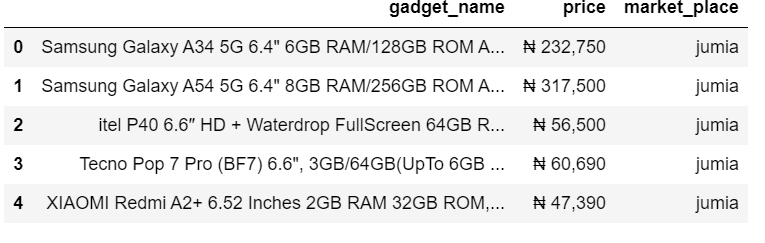 
We coverted the scrapped data to a pandas dataframe. Looking at the data, you can tell it is not clean. You don't like anything dirty, I know. 

<strong>Data cleaning</strong> is a task that requires <em>transforming data into its most appropriate format by identifying and correcting errors, inconsistencies, and inaccuracies in datasets to ensure they are accurate, reliable, and ready for analysis.</em>. 

The data before us has only three columns, which includes gadget_name, price, market_place. The gadget_name column has alot of information compressed into one place which makes the data dirty. We will use regex as our soap.

We can extract data like brand, model, rom, ram, os, battery, height, misc from gadget_name column. To do this we need a way to effectively decompose the data based on different conditions. This is where we need the magical power of RegEx. Let get to work.


<h3> Import Necessary Libraries</h3>

By now you are already familiar with pandas and numpy lib. For a refresher visit pandas and numpy docs. 

To work with RegEx in python, you need the regex library. Python's module for regular expressions, known as re, provides extensive functionality for working with regex patterns. The re module is equipped with numerous useful functions and methods, many of which you'll explore in the upcoming tutorials in this series. However, at this stage, the primary emphasis will be on understanding and utilizing the re.search() function.

In [2]:
import pandas as pd
import numpy as np
#import regex library
import re

<h3>Read the dirty gadget dataset</h3>

In [3]:
df = pd.read_csv('C:/Users/LENOVO/Desktop/dirtygadget.csv')
df.head()

,Unnamed: 0,gadget_name,price,market_place
0,0,"Samsung Galaxy A34 5G 6.4"" 6GB RAM/128GB ROM A...","₦ 232,750",jumia
1,1,"Samsung Galaxy A54 5G 6.4"" 8GB RAM/256GB ROM A...","₦ 317,500",jumia
2,2,itel P40 6.6″ HD + Waterdrop FullScreen 64GB R...,"₦ 56,500",jumia
3,3,"Tecno Pop 7 Pro (BF7) 6.6"", 3GB/64GB(UpTo 6GB ...","₦ 60,690",jumia
4,4,"XIAOMI Redmi A2+ 6.52 Inches 2GB RAM 32GB ROM,...","₦ 47,390",jumia


In [ ]:
# Drop unnecesary column Unnamed: 0
'''
this column is the index generated by pandas. 
It was added automatically generated by pandas when we converted the data to a dataframe. 
'''
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.head()

,gadget_name,price,market_place
0,"Samsung Galaxy A34 5G 6.4"" 6GB RAM/128GB ROM A...","₦ 232,750",jumia
1,"Samsung Galaxy A54 5G 6.4"" 8GB RAM/256GB ROM A...","₦ 317,500",jumia
2,itel P40 6.6″ HD + Waterdrop FullScreen 64GB R...,"₦ 56,500",jumia
3,"Tecno Pop 7 Pro (BF7) 6.6"", 3GB/64GB(UpTo 6GB ...","₦ 60,690",jumia
4,"XIAOMI Redmi A2+ 6.52 Inches 2GB RAM 32GB ROM,...","₦ 47,390",jumia


<h3> Let's Keep It Simple Stupid </h3>

We will write a function that will apply regex on the data gadget_name column. The function will return brand, model, rom, ram, os, battery, height, misc.

In [12]:
def split_gadget_name(name):
    # Initialize variables
    brand = ''
    model = ''
    rom = ''
    ram = ''
    os = ''
    battery = ''
    height = ''
    misc = ''

    # Extract brand using uppercase letters until the first space
    match = re.search(r'([a-zA-Z]+\b)', name)
    if match:
        brand = match.group()

    # Extract model using a combination of uppercase and numeric characters
    match = re.search(r'([a-zA-Z0-9]+\s*\d+)', name)
    if match:
        model = match.group()

    # Extract RAM using numeric characters followed by 'GB RAM'
    match = re.search(r'(\d+GB\s*RAM|\s*\d+GB\s*RAM|\s*\d+GB-RAM|\s*\d+GB-\s*RAM-)', name)
    if match:
        ram = match.group()

    # Extract ROM using numeric characters followed by 'GB ROM'
    match = re.search(r'(\d+GB\s*ROM|/\d+GB\s*ROM-|\[+]\d+GB[(])|[RAM]+\d+GB', name)
    if match:
        rom = match.group()
    aos = 'Android'
    # Extract OS using capitalized words followed by 'OS'
    match = re.search(r'(Android\s*\d+|Android\s*\d+\s*)', name)
    if match:
        os = match.group()

    # Extract battery using numeric characters followed by 'mAh'
    match = re.search(r'(\d+mAh)', name)
    if match:
        battery = match.group()
    
    # Extract height using numeric characters followed by 'inch'
    match = re.search(r'(\d.\d+"|\d.\d+"\s*)', name)
    if match:
        height = match.group()

    # Extract miscellaneous using the remaining text after previous extractions
    misc = re.sub(r'\b({}|{}|{}|{}|{}|{}|{})\b'.format(brand, model, rom, ram, os, battery, height), '', name).strip()

    return brand, model, rom, ram, os, battery, height, misc

# Apply the splitting function to the 'Gadget Name' column
df[['brand', 'model', 'rom', 'ram', 'os', 'battery', 'height', 'misc']] = df['gadget_name'].apply(split_gadget_name).apply(pd.Series)


In [14]:
# Display the resulting DataFrame
df

,gadget_name,price,market_place,brand,model,rom,ram,os,battery,height,misc
0,"Samsung Galaxy A34 5G 6.4"" 6GB RAM/128GB ROM A...","₦ 232,750",jumia,Samsung,A34 5,128GB ROM,6GB RAM,Android 13,,"6.4""","Galaxy A34 5G 6.4"" 6GB RAM/ - Awesome Lime"
1,"Samsung Galaxy A54 5G 6.4"" 8GB RAM/256GB ROM A...","₦ 317,500",jumia,Samsung,A54 5,256GB ROM,8GB RAM,Android 13,,"6.4""","Galaxy A54 5G 6.4"" 8GB RAM/ - Awesome Lime"
2,itel P40 6.6″ HD + Waterdrop FullScreen 64GB R...,"₦ 56,500",jumia,itel,P40 6,64GB ROM,,,,,.6″ HD + Waterdrop FullScreen + 7GB-BLACK
3,"Tecno Pop 7 Pro (BF7) 6.6"", 3GB/64GB(UpTo 6GB ...","₦ 60,690",jumia,Tecno,Pop 7,,6GB RAM,,5000mAh,"6.6""","Pro (BF7) 6.6"", 3GB/64GB(UpTo), - BLACK"
4,"XIAOMI Redmi A2+ 6.52 Inches 2GB RAM 32GB ROM,...","₦ 47,390",jumia,XIAOMI,A2,32GB ROM,2GB RAM,,5000mAh,,"Redmi + 6.52 Inches , - Black"
5,"Tecno Camon 20 &FreeGift 6.67"" 8GB/256GB Andro...","₦ 144,300",jumia,Tecno,Camon 20,,,Android 13,,"6.67""","&FreeGift 6.67"" 8GB/256GB -GlacierGlow"
6,"Samsung Galaxy A14 6.6"" 4GB RAM/128GB ROM And...","₦ 110,350",jumia,Samsung,A14 6,128GB ROM,4GB RAM,Android 13,,"6.6""","Galaxy .6"" 4GB RAM/ - Black"
7,General Electric DCQ Q4 1.77 Camera 1.3 2600m...,"₦ 6,900",jumia,General,Q4 1,,,,2600mAh,,Electric DCQ .77 Camera 1.3 Phone - Black
8,"Tecno Pop 7 Pro 6.6"" 4GB RAM/64GB ROM Android ...","₦ 64,500",jumia,Tecno,Pop 7,64GB ROM,4GB RAM,Android 12,,"6.6""","Pro 6.6"" 4GB RAM/ - Black"
9,"Tecno Spark 10c 6.6"" 4GB RAM/128GB ROM Android...","₦ 76,600",jumia,Tecno,Spark 10,128GB ROM,4GB RAM,Android 13,,"6.6""","Spark 10c 6.6"" 4GB RAM/ - Black"


In [8]:
df.describe()

,gadget_name,price,market_place
count,40,40,40
unique,40,36,1
top,"Samsung Galaxy A34 5G 6.4"" 6GB RAM/128GB ROM A...","₦ 144,300",jumia
freq,1,3,40


#### The cleaning operation is still ongoin